
Simulation ended. Results:
User 0 transmitted 94023 times, total data transmitted: -3024.0 bits, average transmission rate: -0.000 Mbps
Total rate :  18.804349600000002

Simulation ended. Results:
User 0 transmitted 7892 times, total data transmitted: 94704000 bits, average transmission rate: 1.578 Mbps
User 1 transmitted 8738 times, total data transmitted: 104856000 bits, average transmission rate: 1.748 Mbps
User 2 transmitted 8152 times, total data transmitted: 97824000 bits, average transmission rate: 1.630 Mbps
User 3 transmitted 7843 times, total data transmitted: 94116000 bits, average transmission rate: 1.569 Mbps
User 4 transmitted 7765 times, total data transmitted: 93180000 bits, average transmission rate: 1.553 Mbps
User 5 transmitted 7978 times, total data transmitted: 95736000 bits, average transmission rate: 1.596 Mbps
User 6 transmitted 8102 times, total data transmitted: 97224000 bits, average transmission rate: 1.620 Mbps
User 7 transmitted 8198 times, total data tra

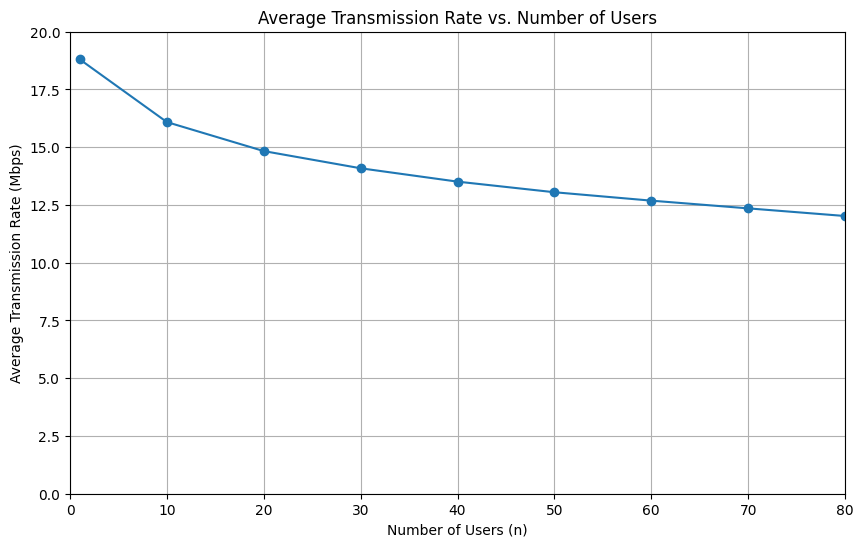

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from main_latest import create_users, simulate_transmission, print_mode  # インポート

# パラメータ
rate = 24  # Mbps
duration = 60  # seconds
mode = 'g'  # Transmission mode
# n_values = range(1, 81, 10)  # n = 1, 10, 20, ..., 80
n_values = [1, 10, 20, 30, 40, 50, 60, 70, 80]

# 結果を格納
n_list = []
total_rates = []

# 異なるユーザー数でシミュレーションを実行
for n in n_values:
    users = create_users(n)
    total_data_transmitted = simulate_transmission(users, duration, rate, output_mode=print_mode[2], mode=mode)
    average_rate = total_data_transmitted / duration / 10**6  # Mbps
    n_list.append(n)
    total_rates.append(average_rate)

print(n_values)

# 結果をプロット
plt.figure(figsize=(10, 6))
plt.ylim(0, 20)
plt.xlim(0, 80)
plt.plot(n_list, total_rates, marker='o', linestyle='-')
plt.title("Average Transmission Rate vs. Number of Users")
plt.xlabel("Number of Users (n)")
plt.ylabel("Average Transmission Rate (Mbps)")
plt.grid(True)
plt.show()



Simulation ended. Results:
User 0 transmitted 94054 times, total data transmitted: -1295.9999999999998 bits, average transmission rate: -0.000 Mbps
Total rate :  18.810578399999997

Simulation ended. Results:
User 0 transmitted 8270 times, total data transmitted: 99240000 bits, average transmission rate: 1.654 Mbps
User 1 transmitted 7665 times, total data transmitted: 91980000 bits, average transmission rate: 1.533 Mbps
User 2 transmitted 8894 times, total data transmitted: 106728000 bits, average transmission rate: 1.779 Mbps
User 3 transmitted 8295 times, total data transmitted: 99540000 bits, average transmission rate: 1.659 Mbps
User 4 transmitted 7602 times, total data transmitted: 91224000 bits, average transmission rate: 1.520 Mbps
User 5 transmitted 8110 times, total data transmitted: -432.0 bits, average transmission rate: -0.000 Mbps
User 6 transmitted 7758 times, total data transmitted: 93096000 bits, average transmission rate: 1.552 Mbps
User 7 transmitted 8347 times, tot

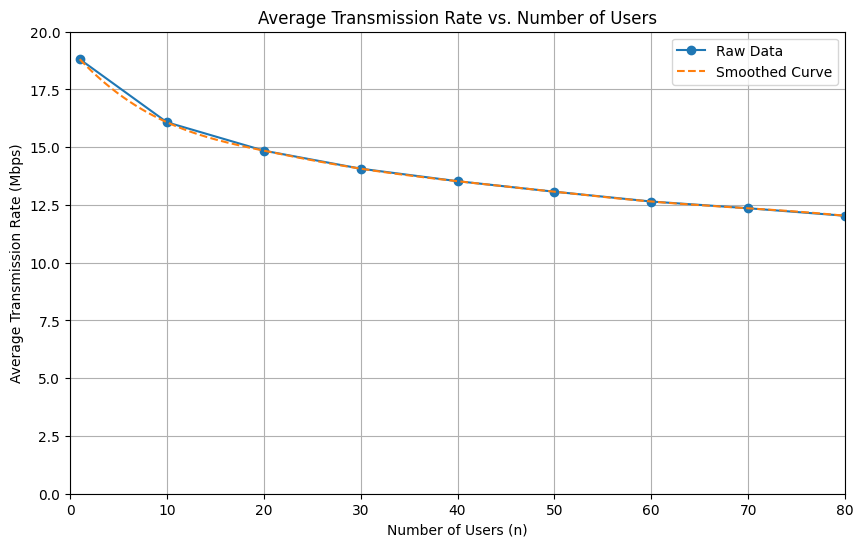

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from main_latest import create_users, simulate_transmission, print_mode  # インポート

# パラメータ
rate = 24  # Mbps
duration = 60  # seconds
mode = 'g'  # Transmission mode
n_values = [1, 10, 20, 30, 40, 50, 60, 70, 80]

# 結果を格納
n_list = []
total_rates = []

# 異なるユーザー数でシミュレーションを実行
for n in n_values:
    users = create_users(n)
    total_data_transmitted = simulate_transmission(users, duration, rate, output_mode=print_mode[2], mode=mode)
    average_rate = total_data_transmitted / duration / 10**6  # Mbps
    n_list.append(n)
    total_rates.append(average_rate)

print(n_values)

# スムーズな曲線を生成
n_array = np.array(n_list)
rate_array = np.array(total_rates)
n_smooth = np.linspace(n_array.min(), n_array.max(), 500)  # スムーズなnの範囲を生成
smooth_rate = make_interp_spline(n_array, rate_array)(n_smooth)  # 補間を計算

# 結果をプロット
plt.figure(figsize=(10, 6))
plt.ylim(0, 20)
plt.xlim(0, 80)

# 元データとスムーズな曲線をプロット
plt.plot(n_list, total_rates, marker='o', linestyle='-', label="Raw Data")
plt.plot(n_smooth, smooth_rate, linestyle='--', label="Smoothed Curve")

plt.title("Average Transmission Rate vs. Number of Users")
plt.xlabel("Number of Users (n)")
plt.ylabel("Average Transmission Rate (Mbps)")
plt.grid(True)
plt.legend()
plt.show()
